[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/SolutionHW10.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/SolutionHW10.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Solution HW 10

In [2]:
def goldsectmin(f, a, b, tol):
    """
    GOLDSECTMIN finds a minimum of the function f in the interval [a,b]
    using the golden section method
    """
    l = (-1 + math.sqrt(5))/2 # ratio of the golden section
    x1 = l*a + (1-l)*b        # 1st intermediate point
    x2 = (1-l)*a + l*b        # 2nd intermediate point
    f1 = f(x1)
    f2 = f(x2)

    while abs(b - a) > tol:
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = (1-l)*a + l*b
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = l*a + (1-l)*b
            f1 = f(x1)
    return x1

## optimization problem:
Suppose everyone has a fixed number of heartbeats available in their life. Let $x$ be the proportion of the time that the person spends in sporting activities. During sport, the heart beats at 120 beats per minute, when resting $g(x)$ beats per minute, whereby $g(0) = 80$ for untrained people, and $g(x)$ quickly falls for larger $x$ to $50$, e.g.

In [3]:
g = lambda x: 50 + 30*np.exp(-100*x)

The average number $f(x)$ of heartbeats per minute is thus

In [4]:
f = lambda x: 120* x + g(x) * (1 - x)

How many minutes of exercise per day should you do to keep your average heart rate as low as possible? So find the minimum of $f(x)$ using the above algorithm.

In [5]:
x_min = goldsectmin(f, 0, 1, 1e-6)
print(f"The optimal exersise time is {x_min*24*60} minutes per day.")
x_min

The optimal exersise time is 53.71458937808303 minutes per day.


0.03730179817922433

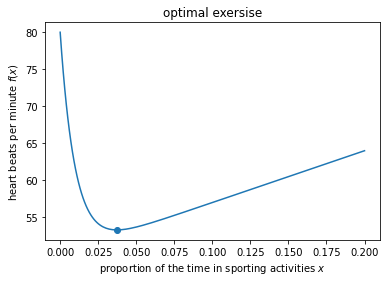

In [6]:
x = np.linspace(0, .2, 200)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.scatter(x_min, f(x_min))
ax.set(xlabel='proportion of the time in sporting activities $x$', ylabel='heart beats per minute $f(x)$')
ax.set_title('optimal exersise');